In [17]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Store filepath in a variable
census_data = "chicago_census_data.csv"
vaccine_data = "COVID-19_Vaccinations_by_ZIP_Code.csv"

In [19]:
census_df = pd.read_csv(census_data, encoding="ISO-8859-1")
vaccine_df = pd.read_csv(vaccine_data,encoding="ISO-8859-1")

In [20]:
#cleaning census so Zip Code column matches Vaccinee CSV Zip Code
census_df = census_df.rename(columns={"Zipcode":"Zip Code"})
census_df.dtypes

Zip Code               int64
Population             int64
Median Age           float64
Household Income       int64
Per Capita Income      int64
Poverty Count          int64
Poverty Rate         float64
dtype: object

In [21]:
#getting rid of 'Unknown' values in vaccine df
vaccine_df = vaccine_df[vaccine_df["Zip Code"] != "Unknown"]
#changing Zip Code from Object to int
vaccine_df["Zip Code"]=vaccine_df["Zip Code"].astype(int)

In [22]:
#merging Data
merge_df = pd.merge(vaccine_df, census_df, on="Zip Code")
merge_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,Population_x,ZIP Code Location,Row_ID,Population_y,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,60603,12/15/2020,0,0,0,0,0.000,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201215,1052,31.2,146250,134620,142,13.498099
1,60603,12/16/2020,0,0,0,0,0.000,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201216,1052,31.2,146250,134620,142,13.498099
2,60603,12/17/2020,8,8,8,8,0.008,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201217,1052,31.2,146250,134620,142,13.498099
3,60603,12/18/2020,6,14,6,14,0.013,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201218,1052,31.2,146250,134620,142,13.498099
4,60603,12/19/2020,3,17,3,17,0.016,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201219,1052,31.2,146250,134620,142,13.498099
5,60603,12/20/2020,4,21,4,21,0.020,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201220,1052,31.2,146250,134620,142,13.498099
6,60603,12/21/2020,5,26,5,26,0.025,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201221,1052,31.2,146250,134620,142,13.498099
7,60603,12/22/2020,7,33,7,33,0.031,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201222,1052,31.2,146250,134620,142,13.498099
8,60603,12/23/2020,0,33,0,33,0.031,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201223,1052,31.2,146250,134620,142,13.498099
9,60603,12/24/2020,1,34,1,34,0.032,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201224,1052,31.2,146250,134620,142,13.498099


In [23]:
test_df = merge_df.loc[merge_df["Population_x"] != merge_df["Population_y"]]
test_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,Population_x,ZIP Code Location,Row_ID,Population_y,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate


In [24]:
# final_df.columns.tolist()

In [25]:
final_df = merge_df.drop(columns=['Row_ID', 'Household Income', 'Population_x', 'Vaccine Series Completed - Daily','Vaccine Series Completed - Cumulative','Vaccine Series Completed  - Percent Population'])
final_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income,Poverty Count,Poverty Rate
0,60603,12/15/2020,0,0,0,0,0.000,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
1,60603,12/16/2020,0,0,0,0,0.000,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
2,60603,12/17/2020,8,8,8,8,0.008,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
3,60603,12/18/2020,6,14,6,14,0.013,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
4,60603,12/19/2020,3,17,3,17,0.016,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
5,60603,12/20/2020,4,21,4,21,0.020,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
6,60603,12/21/2020,5,26,5,26,0.025,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
7,60603,12/22/2020,7,33,7,33,0.031,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
8,60603,12/23/2020,0,33,0,33,0.031,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
9,60603,12/24/2020,1,34,1,34,0.032,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099


In [26]:
#create line graphs that compare % complete on last day for each zip code
#to % complete for Chicago using final df (create a new df with final day)
#save as a png lowest average and highest average for presentation
#(See Matplot Lib Day 2 Activity 7)- Eugene
# if time, line graph 
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5858 entries, 0 to 5857
Data columns (total 13 columns):
Zip Code                         5858 non-null int64
Date                             5858 non-null object
Total Doses - Daily              5858 non-null int64
Total Doses - Cumulative         5858 non-null int64
1st Dose - Daily                 5858 non-null int64
1st Dose - Cumulative            5858 non-null int64
1st Dose - Percent Population    5858 non-null float64
ZIP Code Location                5858 non-null object
Population_y                     5858 non-null int64
Median Age                       5858 non-null float64
Per Capita Income                5858 non-null int64
Poverty Count                    5858 non-null int64
Poverty Rate                     5858 non-null float64
dtypes: float64(3), int64(8), object(2)
memory usage: 640.7+ KB


In [27]:
## copied the following import statements to the beginning of the merged code.
# import matplotlib.pyplot as plt
# import numpy as np

## make a copy of the final_df
final_date_df = final_df

## Convert the Date column from String object datatype to a Datetime object for date comparison later
final_date_df['Date'] = pd.to_datetime(final_date_df['Date'], format='%m/%d/%Y')

final_date_df.head(2)

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income,Poverty Count,Poverty Rate
0,60603,2020-12-15,0,0,0,0,0.0,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099
1,60603,2020-12-16,0,0,0,0,0.0,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099


In [28]:
## Group by Zip Code, check to make sure that the Date is unique for each zip code
count = len(final_date_df.groupby('Zip Code')['Date'])
unique_count = len(final_date_df.groupby('Zip Code')['Date'].unique())
print(f"count = {count}, unique_count = {unique_count}")

## Group by Zip Code, and then get the index of columns with the max date
## idxmax(): Return index of first occurrence of maximum over requested axis.
idx_of_max_date_ser = final_date_df.groupby('Zip Code')['Date'].idxmax()

## Create a new df with only rows that have the max_date
final_max_date_df = final_date_df.loc[idx_of_max_date_ser]
final_max_date_df.describe()

count = 58, unique_count = 58


,Zip Code,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Population_y,Median Age,Per Capita Income,Poverty Count,Poverty Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,60634.603448,301.603448,17300.758621,223.655172,11682.637931,0.261500,47659.275862,35.377586,46735.206897,8551.620690,17.409614
std,32.696874,223.795641,10131.999322,164.530544,7036.613235,0.095222,25788.399641,3.657678,33444.920817,6038.624759,9.658486
min,60601.000000,4.000000,472.000000,3.000000,330.000000,0.012000,823.000000,30.200000,14361.000000,17.000000,1.484716
25%,60615.250000,157.250000,10121.250000,125.000000,6728.750000,0.212500,29118.250000,32.300000,23500.250000,3484.250000,8.875031
50%,60630.500000,260.000000,16672.000000,177.500000,11300.500000,0.257000,46612.000000,34.500000,33537.500000,8053.000000,15.873430
75%,60645.750000,420.000000,23624.250000,335.250000,15772.250000,0.304250,66846.750000,37.950000,62836.250000,13320.750000,23.947888
max,60827.000000,978.000000,36794.000000,802.000000,27423.000000,0.592000,110029.000000,43.600000,136766.000000,24510.000000,41.631320


In [29]:
# ## Create a data series with zip code and max date
# zip_date_ser = final_date_df.groupby('Zip Code')['Date'].max()
# zip_date_ser.reset_index()

# ## Create a dataframe for merging with the original dataframe
# zip_date_df = pd.DataFrame(zip_date_ser)

# ## Merge on Zip Code and max date via left join
# final_max_date_df = pd.merge(zip_date_df, final_date_df, on=("Zip Code","Date"), how="left")
# final_max_date_df.head(3)

In [30]:
## Add a column of % complete on last day for each zip code
final_max_date_df['1st_dose_percent_complete'] = round(final_max_date_df['1st Dose - Cumulative'] * 100 /final_max_date_df['Population_y'], 2)

## calcuate the mean % complete of Chicago: 
percent_1st_dose_complete_Chicago = round(final_max_date_df['1st Dose - Cumulative'].sum() * 100 / final_max_date_df['Population_y'].sum(), 2)
print(f"percent_1st_dose_complete_Chicago = {percent_1st_dose_complete_Chicago}")

percent_1st_dose_complete_Chicago = 24.51


In [31]:
final_max_date_df.head(3)

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income,Poverty Count,Poverty Rate,1st_dose_percent_complete
3555,60601,2021-03-25,77,6280,55,4024,0.267,POINT (-87.622844 41.886262),15083,33.6,101066,1368,9.069814,26.68
3638,60602,2021-03-25,11,944,7,586,0.512,POINT (-87.628309 41.883136),1145,34.1,128502,17,1.484716,51.18
99,60603,2021-03-25,8,995,8,623,0.592,POINT (-87.625473 41.880112),1052,31.2,134620,142,13.498099,59.22


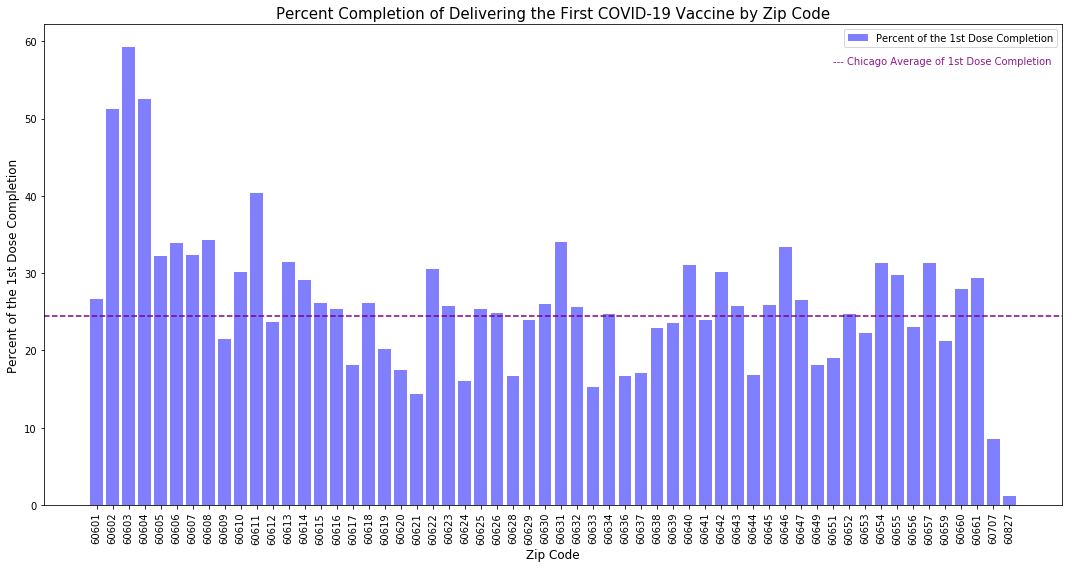

In [32]:
##### plot the zip code & the percent of the 1st dose completion 

## define the xtick labels
x_axis_label = final_max_date_df["Zip Code"]

## Set x axis and y axis
x_axis = np.arange(len(final_max_date_df['Zip Code']))
y_axis = final_max_date_df["1st_dose_percent_complete"]

## Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]

## draw: 
fig, ax = plt.subplots(figsize=(15, 8))
# plt.plot(x_axis, y_axis,linewidth=2, markersize=0, marker="o",color="blue")
plt.bar(x_axis, y_axis, alpha=0.5, align="center", color="blue")


## set up the labels and title
plt.title('Percent Completion of Delivering the First COVID-19 Vaccine by Zip Code',fontsize =15)
plt.xlabel('Zip Code',fontsize =12)
plt.ylabel('Percent of the 1st Dose Completion',fontsize =12)
plt.legend(['Percent of the 1st Dose Completion']) 

## specify how xticks should be drawn
plt.xticks(tick_locations, x_axis_label, rotation=90)

## draw a horizontal line representing the chicago city average of the %1st dose completion
plt.axhline(y = percent_1st_dose_complete_Chicago, color = 'purple', linestyle = '--', label='Chicago average')
# ax.text(x=-2, y=40, s='Chicago Average of 1st Dose Completion', alpha=0.8, color='purple', rotation=90)
ax.text(x=46, y=57, s='--- Chicago Average of 1st Dose Completion', alpha=0.9, color='purple')

plt.tight_layout()
plt.show()


In [77]:
#create heat map of % complete - Sarah 
#save heatmap for presentation


In [78]:
#median age comparison across zip codes - bar graph - John
#median age comparison to % complete/zip code- if time
#save png for presentation


In [79]:
#create a scatterplot comparing average income per capita and % vaccination- Amy
#calculate the r-value